<a href="https://colab.research.google.com/github/ximo2001/03MAIR---Algoritmos-de-Optimizacion/blob/main/Algoritmos_AG1(Introducci%C3%B3n_a_Algoritmos)_Ximo_Sanz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad Guiada 1 de Algoritmos de Optimizacion

Nombre: Ximo Sanz Tornero

https://colab.research.google.com/drive/1Q9y--_SowKaV1GAmjPGNerjhgUwFRaLY

https://github.com/ximo2001/03MAIR---Algoritmos-de-Optimizacion

# Algoritmo de Euclides para calcular el máximo común divisor (MCD)

In [ ]:
def euclides(a, b):
    """
    Calcula el máximo común divisor (MCD) de dos números enteros a y b
    usando el Algoritmo de Euclides.
    """
    while b != 0:
        a, b = b, a % b
    return a

# Ejemplo de uso
num1 = int(input("Introduce el primer número: "))
num2 = int(input("Introduce el segundo número: "))

mcd = euclides(num1, num2)
print(f"El MCD de {num1} y {num2} es: {mcd}")



euclides(24, 12)

Introduce el primer número: 53463
Introduce el segundo número: 3456
El MCD de 53463 y 3456 es: 3


12

#Decorador python para medir el tiempo de ejecución

In [ ]:
import time

# Decorador para medir el tiempo de ejecución
def medir_tiempo(func):
    def wrapper(*args, **kwargs):
        inicio = time.perf_counter()
        resultado = func(*args, **kwargs)
        fin = time.perf_counter()
        print(f"Tiempo de ejecución de '{func.__name__}': {fin - inicio:.6f} segundos")
        return resultado
    return wrapper


# Método de Herón para aproximar la raiz cuadrada


In [ ]:
@medir_tiempo
def raiz_cuadrada_heron(n, tolerancia=1e-10, max_iteraciones=1000):
    """
    Calcula la raíz cuadrada de un número n utilizando el Método de Herón.
    Parámetros:
    - n: Número del cual calcular la raíz cuadrada (debe ser >= 0).
    - tolerancia: Precisión deseada para la solución.
    - max_iteraciones: Número máximo de iteraciones permitidas.

    Retorna:
    - Una aproximación de la raíz cuadrada de n.
    """
    if n < 0:
        raise ValueError("No se puede calcular la raíz cuadrada de un número negativo.")

    # Inicialización de la estimación (puede ser n o un valor aproximado inicial)
    x = n if n != 0 else 0.0
    iteraciones = 0

    while iteraciones < max_iteraciones:
        # Nueva estimación según el método de Herón
        nuevo_x = 0.5 * (x + n / x)

        # Si la diferencia entre iteraciones es menor que la tolerancia, detenerse
        if abs(nuevo_x - x) < tolerancia:
            return nuevo_x

        x = nuevo_x
        iteraciones += 1

    # Si no se alcanzó la tolerancia en el número máximo de iteraciones
    raise RuntimeError(f"No se alcanzó la convergencia después de {max_iteraciones} iteraciones.")

# Ejemplo de uso
numero = float(input("Introduce el número para calcular su raíz cuadrada: "))
resultado = raiz_cuadrada_heron(numero)
print(f"La raíz cuadrada de {numero} es aproximadamente {resultado}")



Introduce el número para calcular su raíz cuadrada: 2
Tiempo de ejecución de 'raiz_cuadrada_heron': 0.000007 segundos
La raíz cuadrada de 2.0 es aproximadamente 1.414213562373095


#Algoritmos de Optimización. Componentes

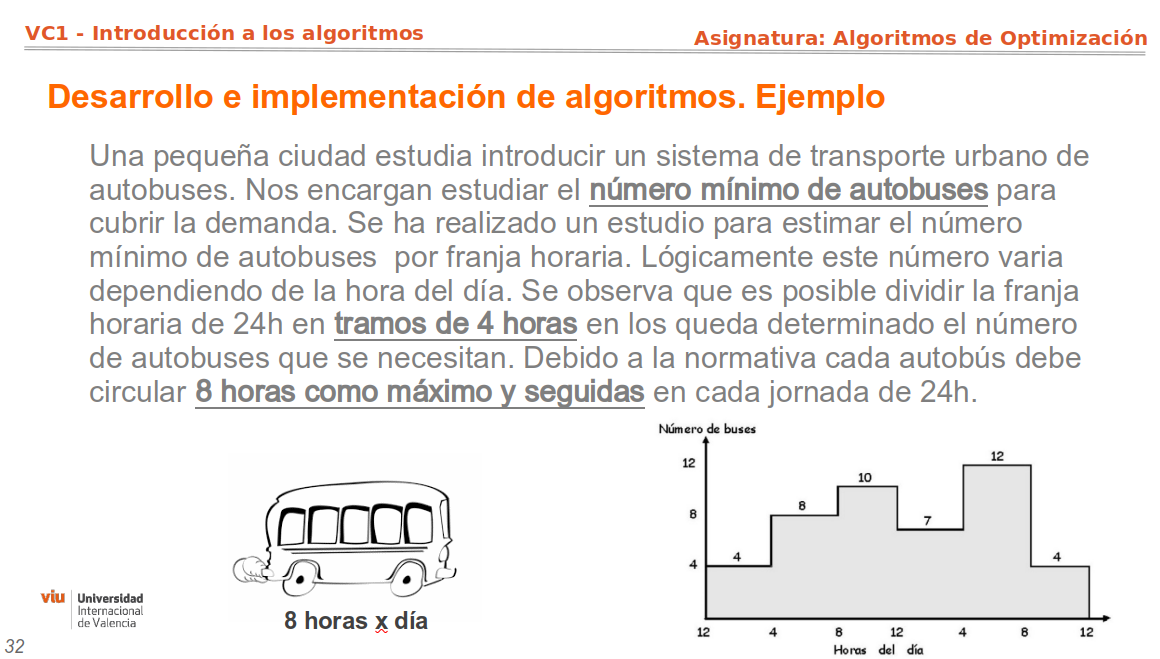

##Variables decisoras

In [ ]:
from itertools import product

# Paso 1: Inicializamos los datos
# Demanda mínima de autobuses por tramo
demanda = [4, 8, 10, 7, 12, 4]  # d[0], d[1], ..., d[5]
tramos = len(demanda)  # Número de tramos (6 en este caso)


#Restricciones

In [ ]:

#Posible Solucion
x = [4,5,6,7,8,9]

for t in range(tramos):
    # Calculamos el número actual de autobuses que están cubriendo el tramo t
    cobertura_actual = x[t] + x[t - 1]  # Autobuses en t y t-1 (cíclico)

    # Si la cobertura actual es menor que la demanda, añadimos autobuses en t
    if cobertura_actual < demanda[t]:
        # Añadimos los autobuses necesarios en el tramo t
        x[t] += demanda[t] - cobertura_actual

#Función Objetivo

$$f(x) = \sum_{i=1}^{6} x_i$$

In [ ]:
#Función objetivo
f_objetivo = sum(x)

In [ ]:
# Se crean funciones tanto para verificar posibles soluciones como para obtener el valor de la función objetivo de la solución

# Función objetivo: suma de todos los x[i]
def funcion_objetivo(solucion):
    return sum(solucion)

# Verificación de restricciones
def verifica_restricciones(solucion):
    for t in range(tramos):
        # Se calcula el número actual de autobuses que están cubriendo el tramo t
        cobertura_actual = solucion[t] + solucion[t - 1]  # Cíclico
        if cobertura_actual < demanda[t]:
            return False
    return True

In [ ]:
# Se realiza el algoritmo por fuerza bruta con todas las posibles combinaciones de valores que tenemos en funcion de la variable demanda
# Generación del espacio de soluciones
espacio_soluciones = product(*(range(d + 1) for d in demanda))

# Búsqueda de la mejor solución
mejor_valor_objetivo = float('inf')
mejores_soluciones = []

for solucion in espacio_soluciones:
    if verifica_restricciones(solucion):
        valor_objetivo = funcion_objetivo(solucion)
        if valor_objetivo < mejor_valor_objetivo:
            mejor_valor_objetivo = valor_objetivo
            mejores_soluciones = [solucion]
        elif valor_objetivo == mejor_valor_objetivo:
            mejores_soluciones.append(solucion)  # Agrega soluciones con el mismo valor

# Resultado
print("Mejores soluciones:")
for solucion in mejores_soluciones:
    print(solucion)
print("Valor mínimo de la función objetivo:", mejor_valor_objetivo)

Mejores soluciones:
(0, 8, 2, 5, 7, 4)
(0, 8, 2, 6, 6, 4)
(0, 8, 2, 7, 5, 4)
(1, 7, 3, 4, 8, 3)
(1, 7, 3, 5, 7, 3)
(1, 7, 3, 6, 6, 3)
(1, 7, 3, 7, 5, 3)
(1, 8, 2, 5, 7, 3)
(1, 8, 2, 6, 6, 3)
(1, 8, 2, 7, 5, 3)
(2, 6, 4, 3, 9, 2)
(2, 6, 4, 4, 8, 2)
(2, 6, 4, 5, 7, 2)
(2, 6, 4, 6, 6, 2)
(2, 6, 4, 7, 5, 2)
(2, 7, 3, 4, 8, 2)
(2, 7, 3, 5, 7, 2)
(2, 7, 3, 6, 6, 2)
(2, 7, 3, 7, 5, 2)
(2, 8, 2, 5, 7, 2)
(2, 8, 2, 6, 6, 2)
(2, 8, 2, 7, 5, 2)
(3, 5, 5, 2, 10, 1)
(3, 5, 5, 3, 9, 1)
(3, 5, 5, 4, 8, 1)
(3, 5, 5, 5, 7, 1)
(3, 5, 5, 6, 6, 1)
(3, 5, 5, 7, 5, 1)
(3, 6, 4, 3, 9, 1)
(3, 6, 4, 4, 8, 1)
(3, 6, 4, 5, 7, 1)
(3, 6, 4, 6, 6, 1)
(3, 6, 4, 7, 5, 1)
(3, 7, 3, 4, 8, 1)
(3, 7, 3, 5, 7, 1)
(3, 7, 3, 6, 6, 1)
(3, 7, 3, 7, 5, 1)
(3, 8, 2, 5, 7, 1)
(3, 8, 2, 6, 6, 1)
(3, 8, 2, 7, 5, 1)
(4, 4, 6, 1, 11, 0)
(4, 4, 6, 2, 10, 0)
(4, 4, 6, 3, 9, 0)
(4, 4, 6, 4, 8, 0)
(4, 4, 6, 5, 7, 0)
(4, 4, 6, 6, 6, 0)
(4, 4, 6, 7, 5, 0)
(4, 5, 5, 2, 10, 0)
(4, 5, 5, 3, 9, 0)
(4, 5, 5, 4, 8, 0)
(4, 5, 5, 5, 7, 0)
(4, 5, 

El problema tiene un orden de complejidad exponencial con respecto a la cantidad de tramos horarios. Esto se debe a que el espacio de soluciones crece exponencialmente al aumentar el número de tramos, ya que para cada tramo se exploran todas las combinaciones posibles desde 0 hasta el valor de la demanda correspondiente.

En términos de complejidad para n tramos y una demanda máxima d, el espacio de soluciones posibles es $ O(d^n) $, lo que representa un crecimiento exponencial respecto al número de tramos.

